In [38]:
import os
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import re

In [39]:
def convert_concentration(concentration):
    number = float(concentration[:-2].replace(',', '.'))
    unit = concentration[-2:]
    factor = {'pg': 1, 'ng': 1e3, 'ug': 1e6}.get(unit, 1)
    return number * factor


In [40]:
path="E:\\Analise_joao\\data\\"

df = pd.read_excel(os.path.join(path,'06_05_25.xlsx'))
df

,Pasta,Tempo (s),Comprimento de Onda (nm)
0,anticorpo,0.00,1592.675502
1,anticorpo,0.84,1592.770570
2,anticorpo,1.68,1592.573341
3,anticorpo,2.52,1592.558556
4,anticorpo,3.36,1592.620822
...,...,...,...
9680,PBS9,75.14,1585.786759
9681,PBS9,78.15,1585.859967
9682,PBS9,81.16,1585.960208
9683,PBS9,84.16,1584.640880


In [41]:
df_concentracao = pd.read_excel(os.path.join(path,'06_05_25.xlsx'))
df_concentracao['Concentração'] = df['Pasta'].apply(lambda x: re.findall(r'IL1_(\d+[,\.]?\d*(?:ng|pg|ug))', x)[0] if re.findall(r'IL1_(\d+[,\.]?\d*(?:ng|pg|ug))', x) else None)
df_concentracao = df_concentracao[df_concentracao['Concentração'].notna()]
df_concentracao['Concentração'] = df_concentracao['Concentração'].apply(convert_concentration)
df_concentracao

,Pasta,Tempo (s),Comprimento de Onda (nm),Concentração
6639,"IL1_1,95pg",0.00,1586.297363,1.95
6640,"IL1_1,95pg",0.54,1586.305125,1.95
6641,"IL1_1,95pg",1.08,1586.510439,1.95
6642,"IL1_1,95pg",1.62,1586.349844,1.95
6643,"IL1_1,95pg",2.16,1586.178908,1.95
...,...,...,...,...
8678,"IL1_62,5pg",306.58,1584.462400,62.50
8679,"IL1_62,5pg",309.60,1584.350696,62.50
8680,"IL1_62,5pg",312.60,1584.255978,62.50
8681,"IL1_62,5pg",315.61,1584.326463,62.50


<Axes: xlabel='Tempo (s)', ylabel='Comprimento de Onda (nm)'>

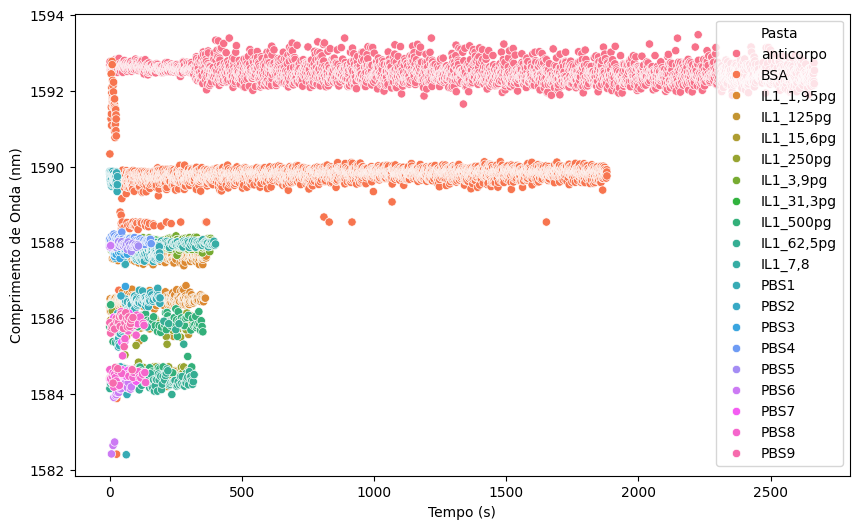

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df['Tempo (s)'], y = df['Comprimento de Onda (nm)'], markers='o', hue=df['Pasta'], legend='full')

<Axes: xlabel='Tempo (s)', ylabel='Comprimento de Onda (nm)'>

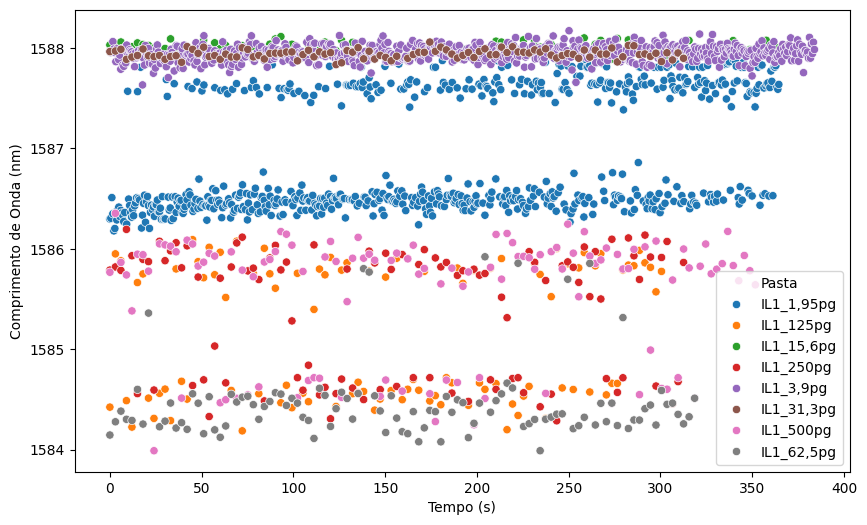

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_concentracao, x=df_concentracao['Tempo (s)'], y = df_concentracao['Comprimento de Onda (nm)'], markers='o', hue=df_concentracao['Pasta'], legend='full')

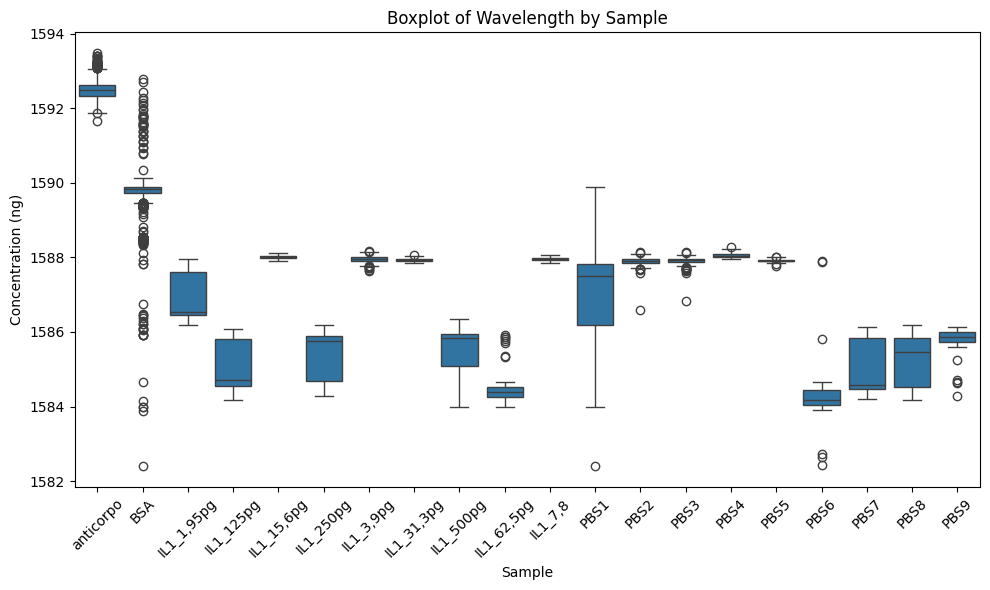

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Pasta'], y = df['Comprimento de Onda (nm)'], legend='full')
plt.title('Boxplot of Wavelength by Sample')
plt.xlabel('Sample')
plt.ylabel('Concentration (ng)')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
df = pd.read_excel(os.path.join(path,'10_04_25.xlsx'))
df

,Pasta,Tempo (s),Comprimento de Onda (nm)
0,IL1_125pg,0.00,1549.524877
1,IL1_125pg,1.52,1549.411136
2,IL1_125pg,3.04,1549.472163
3,IL1_125pg,4.56,1549.546132
4,IL1_125pg,6.08,1549.366289
...,...,...,...
2914,"IL1_7,80pg",878.52,1547.683878
2915,"IL1_7,80pg",880.04,1547.395137
2916,"IL1_7,80pg",881.56,1547.579984
2917,"IL1_7,80pg",883.08,1547.563773


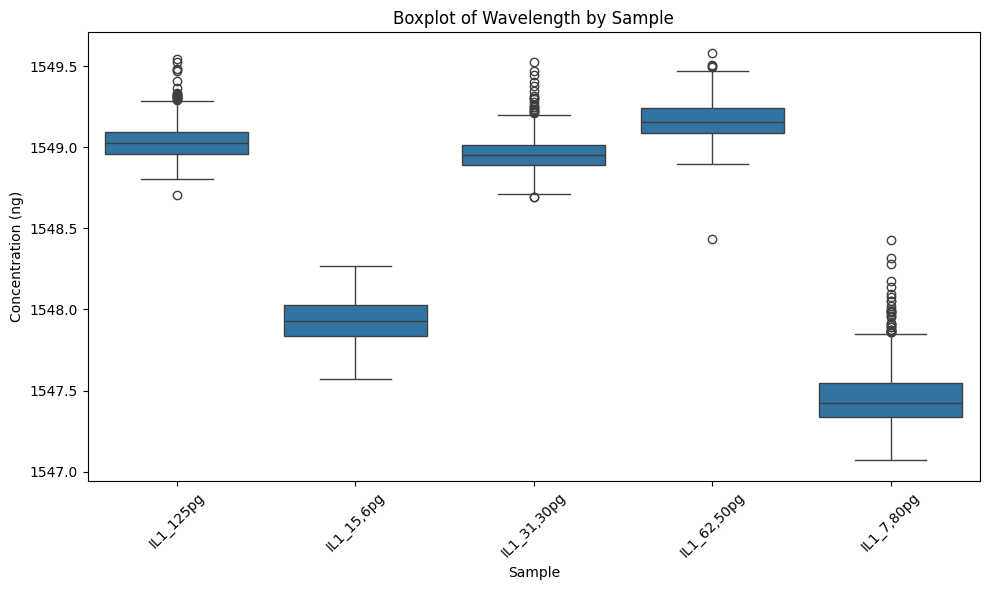

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Pasta'], y = df['Comprimento de Onda (nm)'], legend='full')
plt.title('Boxplot of Wavelength by Sample')
plt.xlabel('Sample')
plt.ylabel('Concentration (ng)')
plt.xticks(rotation=45)
plt.tight_layout()

In [50]:
df = pd.read_excel(os.path.join(path,'28_04_25.xlsx'))
df

,Pasta,Tempo (s),Comprimento de Onda (nm)
0,IL1_125pg,0.00,1593.817043
1,IL1_125pg,1.52,1593.855807
2,IL1_125pg,3.03,1593.758308
3,IL1_125pg,4.56,1593.455606
4,IL1_125pg,6.08,1593.585673
...,...,...,...
1181,"IL1_62,50pg",293.31,1596.291442
1182,"IL1_62,50pg",294.83,1596.353354
1183,"IL1_62,50pg",296.35,1596.258660
1184,"IL1_62,50pg",297.87,1596.398858


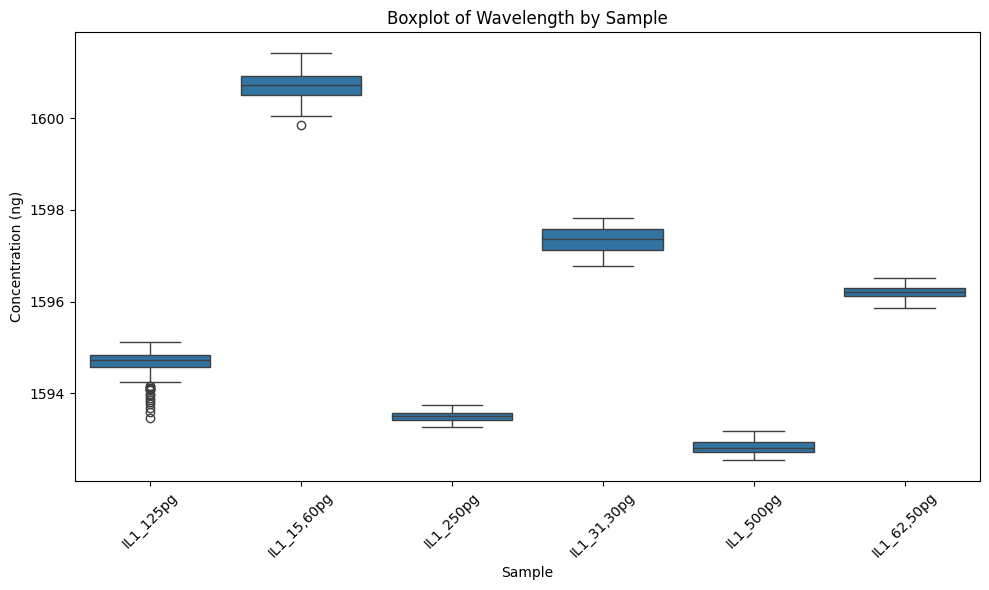

In [51]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x=df['Pasta'], y = df['Comprimento de Onda (nm)'], legend='full')
plt.title('Boxplot of Wavelength by Sample')
plt.xlabel('Sample')
plt.ylabel('Concentration (ng)')
plt.xticks(rotation=45)
plt.tight_layout()